In [28]:
import numpy as np
import pandas as pd

import os

basedir = "/cbscratch/franco/datasets/geuvadis/expression"

# rpkm_df = pd.read_csv(os.path.join(basedir, "RPKMs.reproc.462.allgenes.txt"), sep="\t", header=0, index_col=0)
tpms_df = pd.read_csv(os.path.join(basedir, "TPMS.reproc.462.allgenes.txt"), sep="\t", header=0, index_col=0)
orig_df = pd.read_csv(os.path.join(basedir, "GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz"), sep="\t", header=0, index_col=0) 
rpkms_df = pd.read_csv(os.path.join(basedir, "RPKMs.reproc.462.allgenes.txt"), sep="\t", header=0, index_col=0)


In [22]:
tpms_df_fix = pd.read_csv(os.path.join(basedir, "TPMS.reproc.462.allgenes.fix.txt"), sep="\t", header=0, index_col=0)
rpkms_df_fix = pd.read_csv(os.path.join(basedir, "RPKMs.reproc.462.allgenes.fix.txt"), sep="\t", header=0, index_col=0)

In [23]:
print(tpms_df_fix.shape)
print(tpms_df.shape)

(52780, 462)
(52786, 462)


In [24]:
orig_df_crop = orig_df.drop(["Gene_Symbol", "Chr", "Coord"], axis=1)
orig_genes   = set(list(orig_df_crop.index))
tpms_genes   = set(list(tpms_df.index))
tpms_genes_fix = set(list(tpms_df_fix.index))

common_genes = set.intersection(orig_genes, tpms_genes)
common_genes_fix = set.intersection(orig_genes, tpms_genes_fix)

In [25]:
def centerscale_expr(Y):
    if isinstance(Y, pd.DataFrame):
        Y_cent = (Y.values - np.mean(Y.values, axis = 1).reshape(-1, 1)) / np.std(Y.values, axis = 1).reshape(-1, 1)
        Y_cent = pd.DataFrame(Y_cent, index=Y.index, columns=Y.columns)
        Y_cent.index.name = Y.index.name
    else:
        Y_cent = (Y - np.mean(Y, axis = 1).reshape(-1, 1)) / np.std(Y, axis = 1).reshape(-1, 1)
    return Y_cent

_u, s, _vt = np.linalg.svd(centerscale_expr(tpms_df.loc[list(common_genes)]))
_u, s1, _vt = np.linalg.svd(centerscale_expr(orig_df_crop.loc[list(common_genes)]))
_u, s2, _vt = np.linalg.svd(centerscale_expr(tpms_df_fix.loc[list(common_genes_fix)]))
_u, s3, _vt = np.linalg.svd(centerscale_expr(orig_df_crop.loc[list(common_genes_fix)]))

In [29]:
_u, s_rpkm, _vt = np.linalg.svd(centerscale_expr(rpkms_df.loc[list(common_genes)]))
_u, s_rpkm2, _vt = np.linalg.svd(centerscale_expr(rpkms_df_fix.loc[list(common_genes_fix)]))

<function matplotlib.pyplot.show(close=None, block=None)>

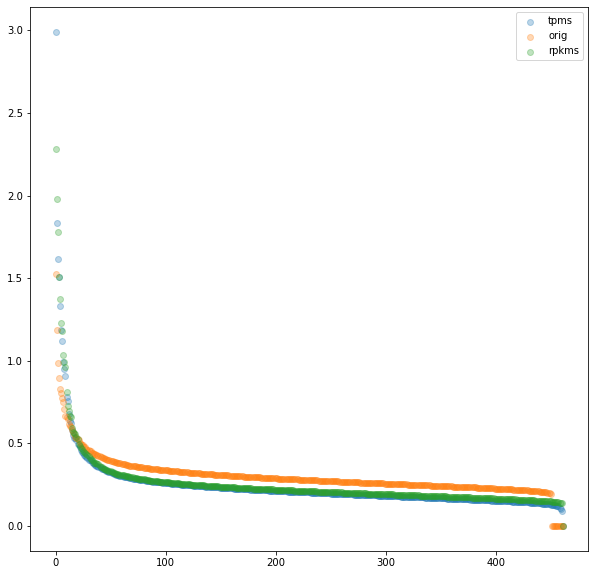

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111)
ax.scatter(np.arange(len(s)), s/len(s), label="tpms", alpha=0.3)
ax.scatter(np.arange(len(s1)), s1/len(s1), label="orig", alpha=0.3)
# ax.scatter(np.arange(len(s2)), s2/len(s2), label="tpms fix", alpha=0.3)
# ax.scatter(np.arange(len(s3)), s3/len(s3), label="orig fix", alpha=0.3)
ax.scatter(np.arange(len(s_rpkm)), s_rpkm/len(s_rpkm), label="rpkms", alpha=0.3)
# ax.scatter(np.arange(len(s_rpkm2)), s_rpkm2/len(s_rpkm2), label="rpkms fix", alpha=0.3)
#ax.set_ylim(-1, 50)
ax.legend()
plt.show

In [ ]:
# Are RPKMs more robust to noise?

In [35]:
new_tpm_df  = pd.read_csv("/cbscratch/franco/datasets/geuvadis/expression/tpms/tpms_qcfilter.txt.protein_coding_lncRNA_filtered", header=0, sep="\t", index_col=0)
new_rpkm_df = pd.read_csv("/cbscratch/franco/datasets/geuvadis/expression/rpkms/rpkms_qcfilter.txt.protein_coding_lncRNA_filtered", header=0, sep="\t", index_col=0)

In [36]:
_u, snew_tpm, _vt = np.linalg.svd(centerscale_expr(new_tpm_df))
_u, snew_rpkm, _vt = np.linalg.svd(centerscale_expr(new_rpkm_df))


<function matplotlib.pyplot.show(close=None, block=None)>

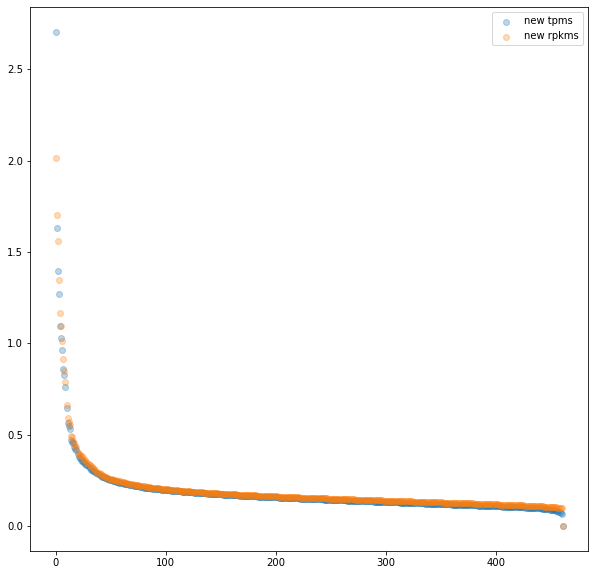

In [39]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111)
ax.scatter(np.arange(len(snew_tpm)), snew_tpm/len(snew_tpm), label="new tpms", alpha=0.3)
ax.scatter(np.arange(len(snew_rpkm)), snew_rpkm/len(snew_rpkm), label="new rpkms", alpha=0.3)
# ax.set_ylim(-0.2, 0.50)
ax.legend()
plt.show